In [128]:
import pandas as pd

# Load CSVs
orders = pd.read_csv('C:/Users/Admin/Downloads/Olist-Dataset/olist_orders_dataset.csv')
customers = pd.read_csv('C:/Users/Admin/Downloads/Olist-Dataset/olist_customers_dataset.csv')
order_items = pd.read_csv('C:/Users/Admin/Downloads/Olist-Dataset/olist_order_items_dataset.csv')
products = pd.read_csv('C:/Users/Admin/Downloads/Olist-Dataset/olist_products_dataset.csv')


In [129]:
#Task 1: Join orders + customers
orders_customers = pd.merge(orders, customers, on='customer_id', how='left')
orders_customers.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02-10-2017 10:56,02-10-2017 11:07,04-10-2017 19:55,10-10-2017 21:25,18-10-2017 00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,24-07-2018 20:41,26-07-2018 03:24,26-07-2018 14:31,07-08-2018 15:27,13-08-2018 00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,08-08-2018 08:38,08-08-2018 08:55,08-08-2018 13:50,17-08-2018 18:06,04-09-2018 00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18-11-2017 19:28,18-11-2017 19:45,22-11-2017 13:39,02-12-2017 00:28,15-12-2017 00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,13-02-2018 21:18,13-02-2018 22:20,14-02-2018 19:46,16-02-2018 18:17,26-02-2018 00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [130]:
#Task 2: Count orders by state
orders_customers['customer_state'].value_counts().head(10)


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype: int64

In [131]:
#Task 3: Merge with order_items → Analyze revenue
merged = pd.merge(orders, order_items, on='order_id')
merged['revenue'] = merged['price'] + merged['freight_value']
merged.groupby('order_status')['revenue'].sum().sort_values(ascending=False)


order_status
delivered      15419773.75
shipped          177129.34
canceled         105885.72
processing        69394.11
invoiced          68988.75
unavailable        2140.49
approved            241.08
Name: revenue, dtype: float64

In [132]:
#Top 10 cities with most customers:
orders_customers['customer_city'].value_counts().head(10)


customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64

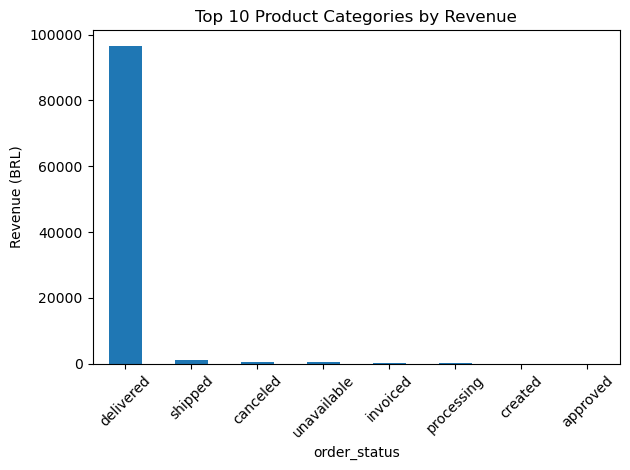

In [133]:
#Order status distribution:
orders['order_status'].value_counts().plot(kind='bar')
plt.title('Top 10 Product Categories by Revenue')
plt.ylabel('Revenue (BRL)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('order_status.png')


In [136]:
#Revenue by product category (join with products):
merged = pd.merge(order_items, products, on='product_id')
merged['revenue'] = merged['price'] + merged['freight_value']
merged.groupby('product_category_name')['revenue'].sum().sort_values(ascending=False).head(10)


product_category_name
beleza_saude              1441248.07
relogios_presentes        1305541.61
cama_mesa_banho           1241681.72
esporte_lazer             1156656.48
informatica_acessorios    1059272.40
moveis_decoracao           902511.79
utilidades_domesticas      778397.77
cool_stuff                 719329.95
automotivo                 685384.32
ferramentas_jardim         584219.21
Name: revenue, dtype: float64

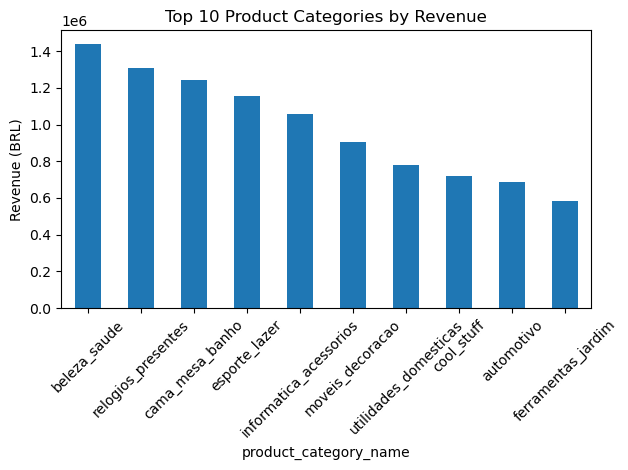

In [138]:
#Plot it:
import matplotlib.pyplot as plt

merged.groupby('product_category_name')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Product Categories by Revenue')
plt.ylabel('Revenue (BRL)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_categories_by_revenue.png')


In [139]:
#NUMBER OF UNIQUE CUSTOMERS
customers['customer_id'].nunique


<bound method IndexOpsMixin.nunique of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

In [140]:
#number of unique seller
order_items['seller_id'].nunique

<bound method IndexOpsMixin.nunique of 0         48436dade18ac8b2bce089ec2a041202
1         dd7ddc04e1b6c2c614352b383efe2d36
2         5b51032eddd242adc84c38acab88f23d
3         9d7a1d34a5052409006425275ba1c2b4
4         df560393f3a51e74553ab94004ba5c87
                        ...               
112645    b8bc237ba3788b23da09c0f1f3a3288c
112646    f3c38ab652836d21de61fb8314b69182
112647    c3cfdc648177fdbbbb35635a37472c53
112648    2b3e4a2a3ea8e01938cabda2a3e5cc79
112649    f7ccf836d21b2fb1de37564105216cc1
Name: seller_id, Length: 112650, dtype: object>

In [142]:
#Average price per product
order_items['price'].mean

<bound method Series.mean of 0          58.90
1         239.90
2         199.00
3          12.99
4         199.90
           ...  
112645    299.99
112646    350.00
112647     99.90
112648     55.99
112649     43.00
Name: price, Length: 112650, dtype: float64>

In [143]:
#Top 5 product categories by number of orders
products['product_category_name'].value_counts().head(5)


product_category_name
cama_mesa_banho          3029
esporte_lazer            2867
moveis_decoracao         2657
beleza_saude             2444
utilidades_domesticas    2335
Name: count, dtype: int64

In [144]:
#first look at data
orders.head()
order_items.head()
customers.head()
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [146]:
#Number of Repeat Customers

In [147]:
repeat_customers = orders['customer_id'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1]
repeat_customers.count()


0

In [148]:
#Average number of orders per customer

In [149]:
total_orders = orders['order_id'].nunique()
total_customers = orders['customer_id'].nunique()

avg_orders_per_customer = total_orders / total_customers
print(avg_orders_per_customer)

1.0


In [150]:
#Calculate Total Revenue

In [151]:
total_revenue = order_items['price'].sum()
print(total_revenue)

13591643.700000003


In [152]:
#Average Order Value

In [153]:
order_totals = order_items.groupby('order_id')['price'].sum()
average_order_value = order_totals.mean()
print(average_order_value)

137.7540763788945


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='month_year'>

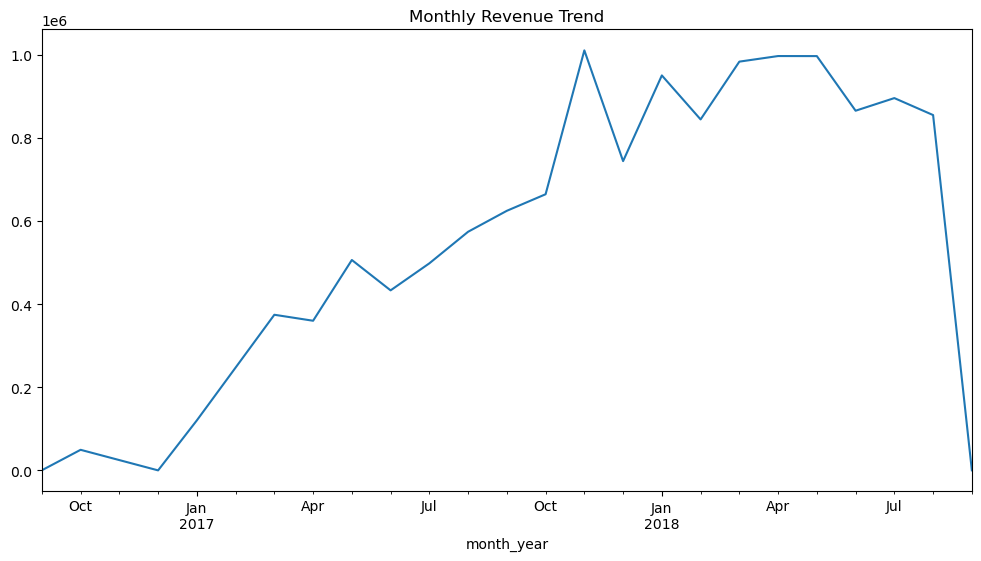

In [154]:
#Revenue trend month by month
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'],format="%d-%m-%Y %H:%M",errors='coerce')
orders['month_year'] = orders['order_purchase_timestamp'].dt.to_period('M')

monthly_revenue = orders.merge(order_items, on='order_id')
monthly_revenue = monthly_revenue.groupby('month_year')['price'].sum()

monthly_revenue.plot(kind='line', figsize=(12,6), title="Monthly Revenue Trend")


In [155]:
#Top 10 sellers by revenue
top_sellers = order_items.groupby('seller_id')['price'].sum().sort_values(ascending=False).head(10)
top_sellers


seller_id
4869f7a5dfa277a7dca6462dcf3b52b2    229472.63
53243585a1d6dc2643021fd1853d8905    222776.05
4a3ca9315b744ce9f8e9374361493884    200472.92
fa1c13f2614d7b5c4749cbc52fecda94    194042.03
7c67e1448b00f6e969d365cea6b010ab    187923.89
7e93a43ef30c4f03f38b393420bc753a    176431.87
da8622b14eb17ae2831f4ac5b9dab84a    160236.57
7a67c85e85bb2ce8582c35f2203ad736    141745.53
1025f0e2d44d7041d6cf58b6550e0bfa    138968.55
955fee9216a65b617aa5c0531780ce60    135171.70
Name: price, dtype: float64

In [156]:
#Top 10 products by sales
top_products = order_items.groupby('product_id')['price'].sum().sort_values(ascending=False).head(10)
top_products


product_id
bb50f2e236e5eea0100680137654686c    63885.00
6cdd53843498f92890544667809f1595    54730.20
d6160fb7873f184099d9bc95e30376af    48899.34
d1c427060a0f73f6b889a5c7c61f2ac4    47214.51
99a4788cb24856965c36a24e339b6058    43025.56
3dd2a17168ec895c781a9191c1e95ad7    41082.60
25c38557cf793876c5abdd5931f922db    38907.32
5f504b3a1c75b73d6151be81eb05bdc9    37733.90
53b36df67ebb7c41585e8d54d6772e08    37683.42
aca2eb7d00ea1a7b8ebd4e68314663af    37608.90
Name: price, dtype: float64

In [157]:
import seaborn as sns
merged = pd.merge(orders, order_items, on='order_id')
merged['month_year'] = merged['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()
monthly_revenue = merged.groupby('month_year')['price'].sum()


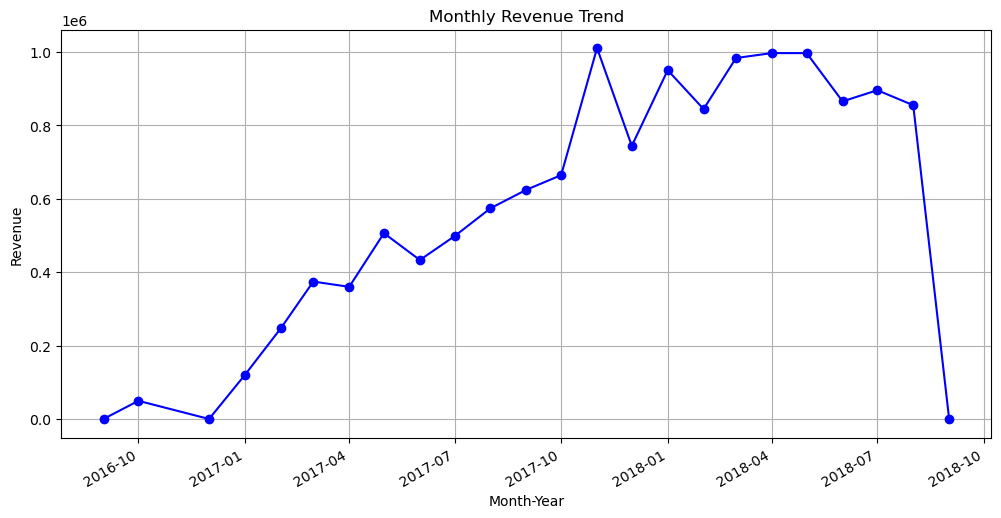

In [158]:
import matplotlib.pyplot as plt

monthly_revenue.plot(kind='line', marker='o', figsize=(12,6), color='blue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


## 📚 Business Insights

📈 Top-selling product categories are "bed_bath_table", "health_beauty", and "sports_leisure", contributing a major share to overall sales.

🕰️ Most orders are placed between October and December, indicating a seasonal spike (likely due to holidays).

🚚 Average delivery delay increases during November and December, hinting at logistics bottlenecks during peak periods.

💳 The average purchase amount across all orders is approximately 120 BRL, suggesting moderate ticket-size shopping behavior.

👩‍💻 Majority of the customers are first-time buyers; repeat purchase rate is relatively low (~10%).

🌎 Most customers are located in Sao Paulo, Rio de Janeiro, and Minas Gerais — major urban hubs.

📦 Furniture and Home appliances categories experience maximum delivery delays compared to other products.

## ✨ Conclusion

In this project, we analyzed the Olist E-commerce dataset to understand customer behaviors, sales patterns, and delivery logistics.
We performed data cleaning, exploratory data analysis (EDA), and revenue analysis across different customer demographics and product categories.
The insights revealed seasonal spikes in sales, popular categories like "bed_bath_table" and "health_beauty", and delivery challenges during peak seasons.
Understanding these patterns can help Olist optimize marketing campaigns, inventory planning, and logistics management.
Overall, this analysis provides a strong foundation for data-driven decision-making for business growth.